## Objective 
#### To explore customer behavior patterns and identify key factors contributing to customer churn using visual and statistical analysis

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(8,5)

df=pd.read_csv("/Users/parvshah/Documents/Code Files/Customer-churn-prediction/data/processed/cleaned_churn_data.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [2]:
churn_counts=df['Churn'].value_counts()
churn_percantage=df['Churn'].value_counts(normalize=True)*100
print(churn_counts,churn_percantage)

Churn
0    5174
1    1869
Name: count, dtype: int64 Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


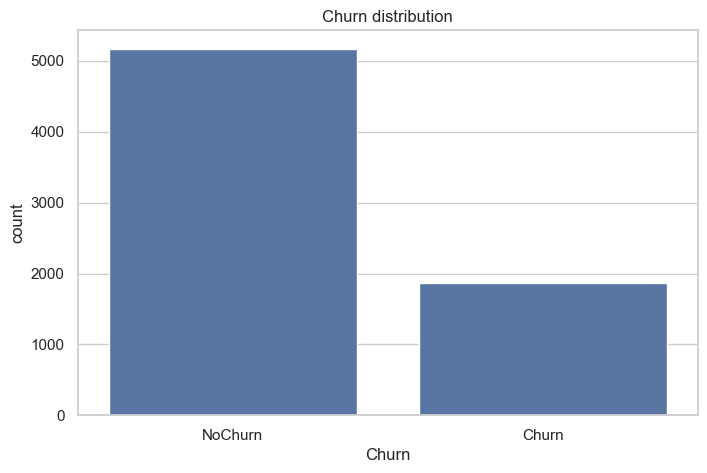

In [3]:
sns.countplot(x="Churn",data=df)
plt.title("Churn distribution")
plt.xticks([0,1],['NoChurn','Churn'])
plt.show()

### Tenure VS Churn 

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.f

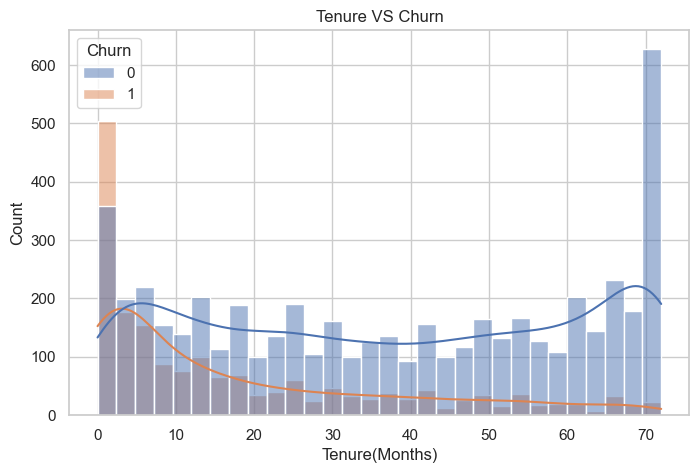

In [4]:
sns.histplot(x='tenure', hue='Churn',bins=30,kde=True,data=df)
plt.title("Tenure VS Churn")
plt.xlabel("Tenure(Months)")
plt.show()

In [5]:
df.groupby("Churn")['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
1,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


### Contract Type vs churn 

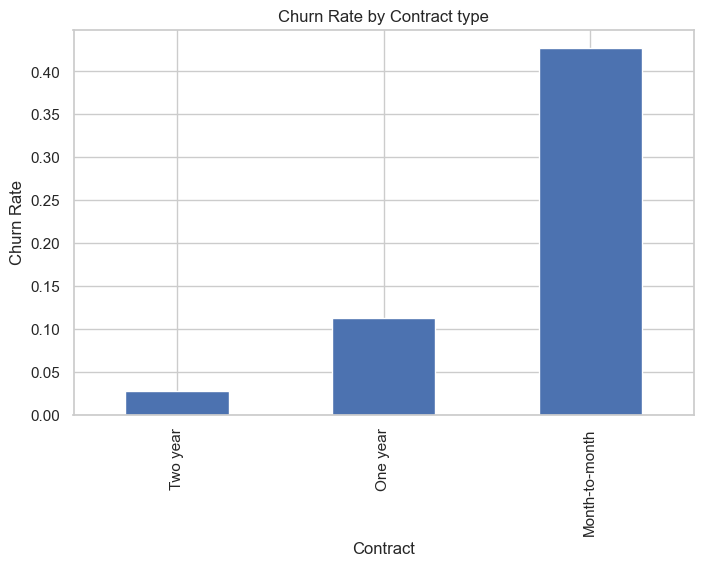

Contract
Two year          0.028319
One year          0.112695
Month-to-month    0.427097
Name: Churn, dtype: float64

In [6]:
contract_churn=df.groupby("Contract")['Churn'].mean().sort_values()

contract_churn.plot(kind="bar")
plt.title('Churn Rate by Contract type')
plt.ylabel("Churn Rate")
plt.show()

contract_churn

### Monthly Charges vs Churn

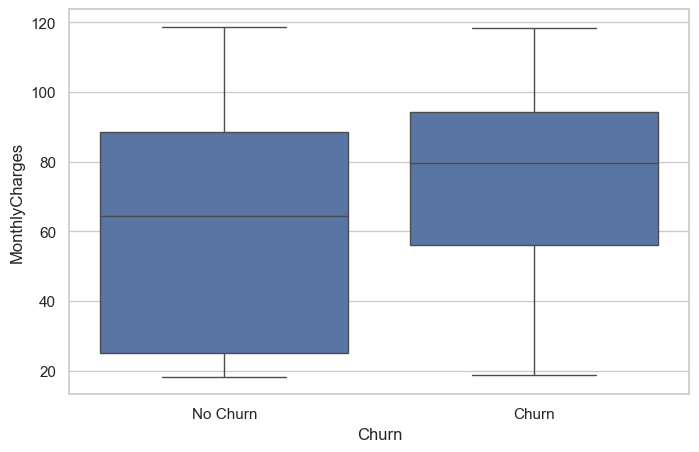

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
1,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


In [7]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)
#plt.title("Monthly Charges vs Churn")
plt.xticks([0, 1], ["No Churn", "Churn"])
plt.show()

df.groupby("Churn")["MonthlyCharges"].describe()

### TotalCharges VS Churn

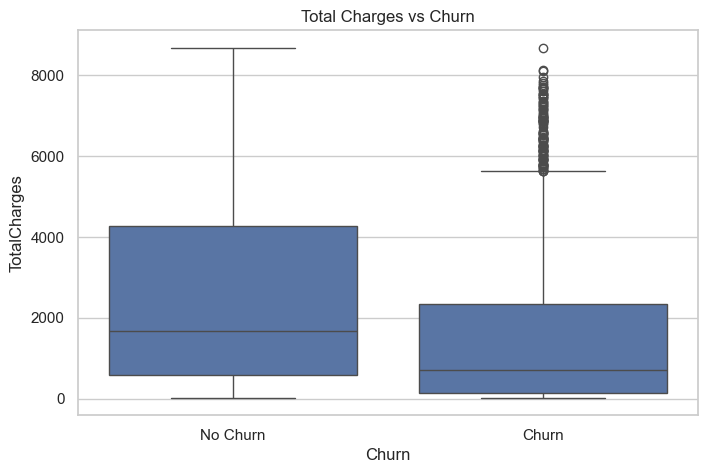

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,5174.0,2552.882494,2327.590132,18.80,579.575,1679.525,4262.85,8672.45
1,1869.0,1531.796094,1890.822994,18.85,134.500,703.550,2331.30,8684.80


In [8]:
sns.boxplot(x="Churn", y="TotalCharges", data=df)
plt.title("Total Charges vs Churn")
plt.xticks([0, 1], ["No Churn", "Churn"])
plt.show()

df.groupby("Churn")["TotalCharges"].describe()

### Services vs Churn

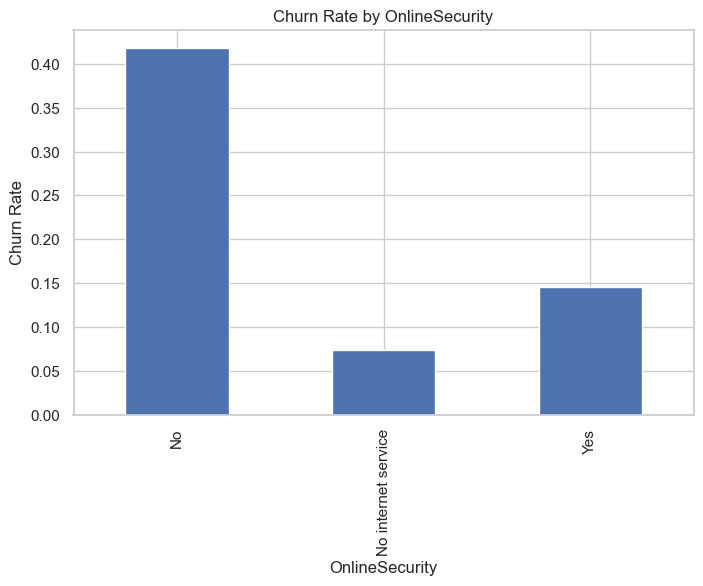

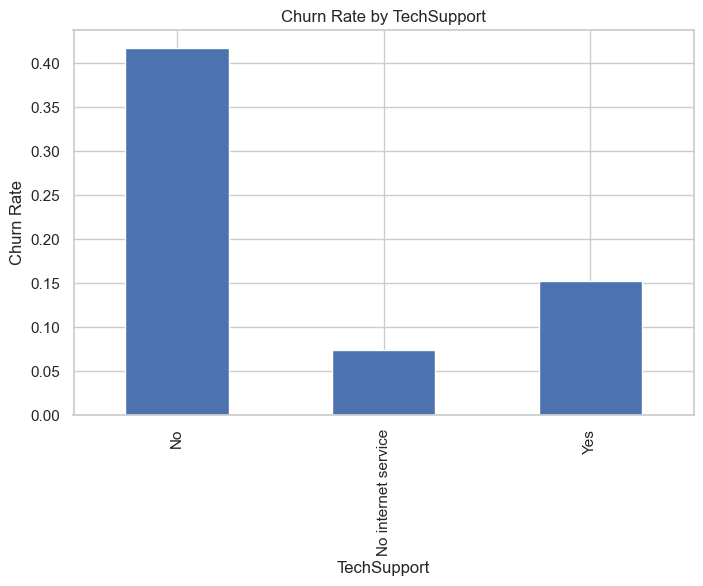

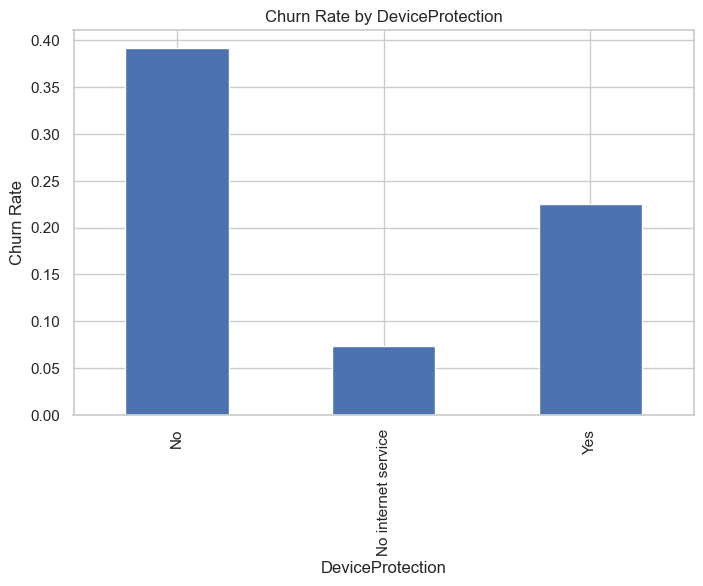

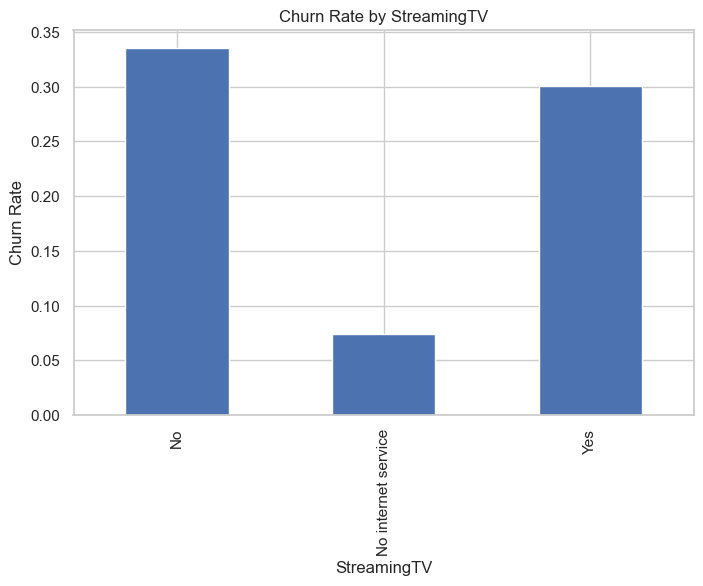

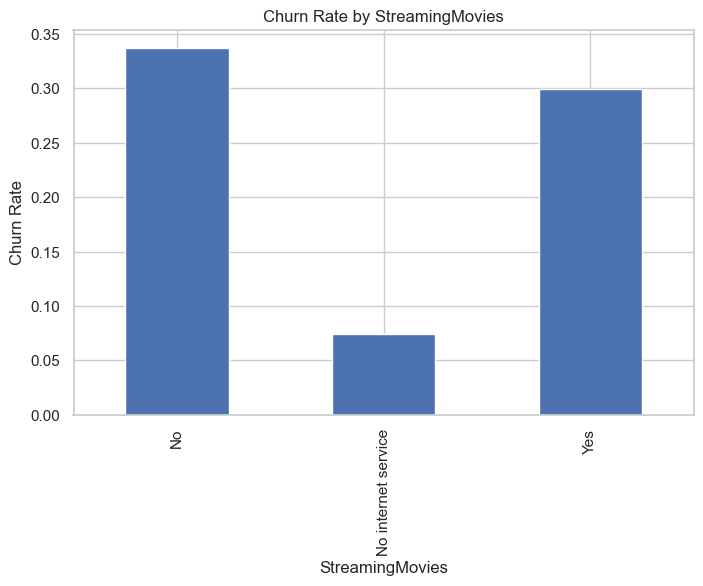

In [9]:
service_cols = [
    "OnlineSecurity",
    "TechSupport",
    "DeviceProtection",
    "StreamingTV",
    "StreamingMovies"
]

for col in service_cols:
    churn_rate = df.groupby(col)["Churn"].mean()
    
    churn_rate.plot(kind="bar")
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.show()

### Demographics vs churn 

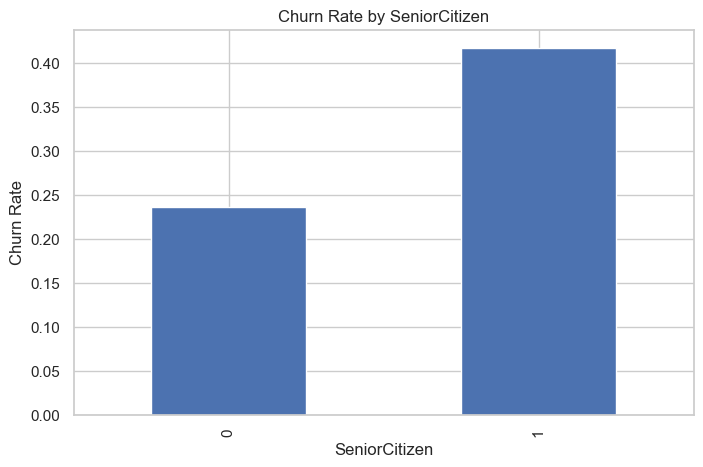

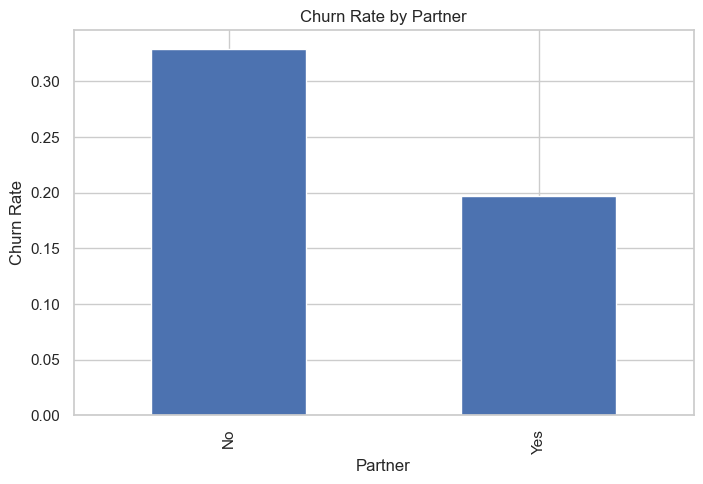

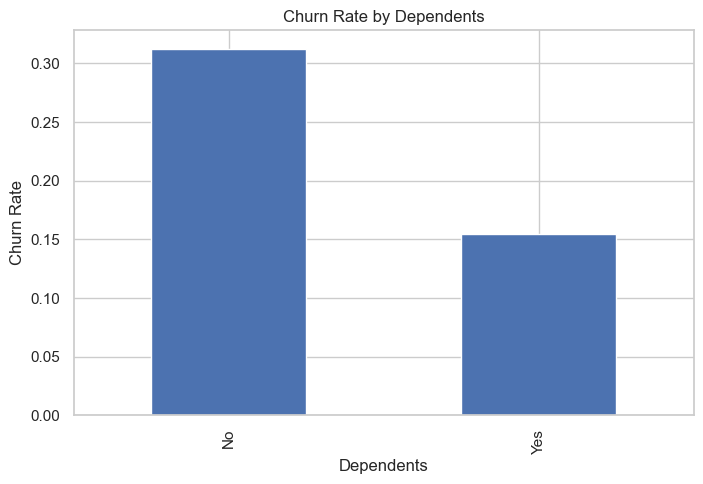

In [10]:
demo_cols = ["SeniorCitizen", "Partner", "Dependents"]

for col in demo_cols:
    churn_rate = df.groupby(col)["Churn"].mean()
    
    churn_rate.plot(kind="bar")
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.show()

### Correlation Analysis

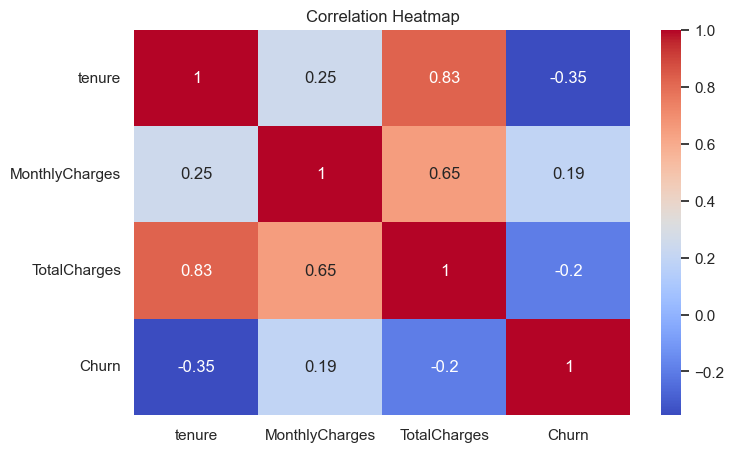

,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.247900,0.825464,-0.352229
MonthlyCharges,0.247900,1.000000,0.650864,0.193356
TotalCharges,0.825464,0.650864,1.000000,-0.199037
Churn,-0.352229,0.193356,-0.199037,1.000000


In [11]:
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges", "Churn"]

corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

corr_matrix

## Key EDA Insights

- Churn rate is ~27%, indicating a class imbalance problem.
- Customers with short tenure are significantly more likely to churn.
- Month-to-month contracts have the highest churn rate.
- Higher monthly charges are associated with higher churn.
- Customers using TechSupport and OnlineSecurity churn less.
- Contract type, tenure, and service usage appear to be the strongest churn drivers.
